#Code Clone Detection Using Machine Learning and Deep Learning

## Course: Machine learning
## Team Members:
* Samed Demir -48160483- samed.demir@ue-germany.de
* Deniz Riza BASOCAK - 94841875 - deniz.basocak@ue-germany.de
* Sorasith Chormalee - 53500842 - sorasith.chormalee@ue-germany.de

### Instructor:
Prof. Dr. Iftikhar Ahmed



#Problem Statement

Code clone detection refers to identifying source code fragments that are syntactically or semantically similar. This problem plays a vital role in software engineering tasks such as plagiarism detection, software maintenance, refactoring, and improving code quality.

The objective of this project is to design and evaluate multiple machine learning and deep learning models to automatically classify whether two source code files are clones or non-clones.


#Dataset

We use the **Google Code Jam (GCJ) Dataset**, a large-scale dataset containing millions of source code solutions submitted by programmers worldwide for competitive programming problems.

#Dataset Characteristics:

Programming Language: Primarily C/C++

Total files: ~2.4 million

Unique problems (tasks): 369

Multiple independent solutions per task

This structure naturally supports clone detection, as solutions to the same task are considered potential clones.

# Data Preprocessing

Steps performed:
1. Removed missing or trivial code files
2. Removed comments and extra whitespace
3. Generated code pairs:
   - Clone pairs: solutions from the same task
   - Non-clone pairs: solutions from different tasks
4. Created a balanced dataset (equal clone and non-clone pairs)


#Data Validation

After preprocessing:

*  Total rows: ~2.4 million
*  Unique tasks: 369
*  Average solutions per task: ~6500

A balanced dataset was created by generating:

* Clone pairs: code solutions from the same task

* Non-clone pairs: code solutions from different tasks

#Selected Models

To study the effectiveness of different approaches, the following models were implemented:

1. Baseline Neural Network (MLP)

* Uses tokenized source code

* Serves as a simple neural baseline

2. Siamese LSTM Network

* Captures sequential patterns in source code

* Learns semantic similarity between code pairs

3. Siamese BiLSTM Network

* Uses bidirectional context for better representation

* Improves upon the standard LSTM architecture

4. CNN-based Code Clone Detection Model

* Extracts local token-level patterns

* Effective for identifying common syntactic structures

Each successive model increases architectural complexity.



#Model 1: Baseline Neural Network (MLP)

A simple multi-layer perceptron was implemented as a baseline model using tokenized representations of the source code.

#Don't Run This Start from This




In [ ]:
#Source GCJ

!git clone https://github.com/Jur1cek/gcj-dataset.git

Cloning into 'gcj-dataset'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 69 (delta 5), reused 0 (delta 0), pack-reused 57 (from 1)
Receiving objects: 100% (69/69), 1.00 GiB | 36.42 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Updating files: 100% (15/15), done.


**Don't Run This




In [ ]:
# import os

# dataset_path = "/content/drive/MyDrive/MachineLeaning/gcj-dataset"

# for f in os.listdir(dataset_path):
#     if f.endswith(".tar.bz2"):
#         file_path = os.path.join(dataset_path, f)
#         !tar -xvjf "{file_path}" -C "{dataset_path}"


gcj2008.csv
gcj2015.csv
gcj2012.csv
^C
gcj2009.csv
^C
gcj2014.csv
gcj2013.csv
^C
gcj2010.csv
^C
gcj2011.csv
gcj2019.csv
gcj2017.csv
gcj2018.csv
gcj2016.csv
gcj2020.csv


In [ ]:
# import os

# csv_files = [f for f in os.listdir("/content/drive/MyDrive/MachineLeaning/gcj-dataset") if f.endswith(".csv")]
# print(csv_files)

Start Import Data **Don't Run This


In [ ]:
import pandas as pd

df_all = pd.read_csv(
    "/content/drive/MyDrive/MachineLeaning/gcj-dataset/gcj_all_years.csv",
    usecols=['task', 'flines']
)

print("Rows after load:", len(df_all))


df_all.head()


Rows after load: 2430848


/tmp/ipython-input-1831445675.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


,task,flines
0,000000000004d962,/**\n * author: tourist\n * created: 10...
1,000000000004d962,/**\n * author: tourist\n * created: 10...
2,000000000004da2d,/**\n * author: tourist\n * created: 10...
3,000000000004da97,/**\n * author: tourist\n * created: 10...
4,000000000004da97,/**\n * author: tourist\n * created: 10...


In [ ]:
df_all.rename(columns={'flines': 'solution'}, inplace=True)

In [ ]:
df_all.dropna(subset=['solution'], inplace=True)

df_all['solution'] = df_all['solution'].astype(str)

df_all = df_all[df_all['solution'].str.len() > 30]

print("Rows after cleaning:", len(df_all))


Rows after cleaning: 2426030


In [ ]:
df_all['task'] = df_all['task'].astype('category')


/tmp/ipython-input-347018276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['task'] = df_all['task'].astype('category')


In [ ]:
print("Total rows:", len(df_all))
print("Unique tasks:", df_all['task'].nunique())

df_all.groupby('task', observed=True).size().describe()


Total rows: 2426030
Unique tasks: 369


,0
count,369.000000
mean,6574.607046
std,14201.182336
min,1.000000
25%,175.000000
50%,1414.000000
75%,6416.000000
max,123214.000000


Preprocess(Slowrun )


In [ ]:
import re

def preprocess_code(code):
    # remove block & line comments
    code = re.sub(r"/\*[\s\S]*?\*/", "", code)
    code = re.sub(r"//.*", "", code)

    # normalize whitespace
    code = re.sub(r"\s+", " ", code)

    return code.strip()

df_all['solution'] = df_all['solution'].apply(preprocess_code)


/tmp/ipython-input-4093895236.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['solution'] = df_all['solution'].apply(preprocess_code)


Sample per task (balanced)

In [ ]:
MAX_SOLUTIONS_PER_TASK = 500  # SAFE

df_sampled = (
    df_all
    .groupby('task', observed=True)
    .apply(lambda x: x.sample(min(len(x), MAX_SOLUTIONS_PER_TASK), random_state=42))
    .reset_index(drop=True)
)

print("Sampled rows:", len(df_sampled))


Sampled rows: 135955


/tmp/ipython-input-2097442547.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), MAX_SOLUTIONS_PER_TASK), random_state=42))


Clone Pair


In [ ]:
import itertools
import random

MAX_CLONE_PAIRS_PER_TASK = 30
TOTAL_CLONE_PAIRS = 40000

pairs = []
clone_count = 0

for task_id, group in df_sampled.groupby('task', observed=True):
    codes = group['solution'].tolist()

    if len(codes) < 2:
        continue

    idx_pairs = list(itertools.combinations(range(len(codes)), 2))
    sampled = random.sample(
        idx_pairs,
        min(MAX_CLONE_PAIRS_PER_TASK, len(idx_pairs))
    )

    for i, j in sampled:
        pairs.append([codes[i], codes[j], 1])
        clone_count += 1

    if clone_count >= TOTAL_CLONE_PAIRS:
        break

print("Clone pairs:", clone_count)


Clone pairs: 10923


GENERATE NON-CLONE PAIRS

In [ ]:
all_data = df_sampled[['solution', 'task']].values.tolist()
non_clone_pairs = []

while len(non_clone_pairs) < clone_count:
    c1, t1 = random.choice(all_data)
    c2, t2 = random.choice(all_data)

    if t1 != t2:
        non_clone_pairs.append([c1, c2, 0])

pairs.extend(non_clone_pairs)


Final

In [ ]:
import pandas as pd

df_pairs = pd.DataFrame(pairs, columns=['code1', 'code2', 'label'])

df_pairs['label'].value_counts()


,count
label,
1,10923
0,10923


In [ ]:
df_pairs.to_csv("/content/drive/MyDrive/MachineLeaning/gcj_code_pairs_final.csv", index=False)


In [ ]:
#for new optimize model

df_pairs.to_csv("/content/drive/MyDrive/MachineLeaning/gcj_code_pairs_final1.csv", index=False)


Split Train

In [ ]:
from sklearn.model_selection import train_test_split

X = df_pairs[['code1', 'code2']]
y = df_pairs['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", len(X_train), "Test size:", len(X_test))


Train size: 17476 Test size: 4370


#Until This above Don't Run

Start


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Lambda
import tensorflow.keras.backend as K
import tensorflow as tf


In [ ]:
#Load Data

df_pairs = pd.read_csv("/content/drive/MyDrive/MachineLeaning/gcj_code_pairs_final.csv")

# Check columns
print(df_pairs.columns)
print(df_pairs.head())


Index(['code1', 'code2', 'label'], dtype='object')
                                               code1  \
0  #include <stdio.h> #include <stdlib.h> #includ...   
1  #include <stdio.h> #include <stdlib.h> #define...   
2  #include <cstdio> #include <vector> using name...   
3  public class MyVector{ long x; long y; public ...   
4  import java.io.*; import java.util.Arrays; cla...   

                                               code2  label  
0  #include <vector> #include <list> #include <ma...      1  
1  #include <stdio.h> #include <iostream> using n...      1  
2  <? echo "<pre>"; echo 917650 * 762368 + 746598...      1  
3  #include <vector> #include <list> #include <ma...      1  
4  #include <iostream> #include <fstream> #includ...      1  


Handle NAN


In [ ]:
# Convert to strings and fill missing
for col in ['code1', 'code2']:
    df_pairs[col] = df_pairs[col].fillna("").astype(str)

# Remove very short code snippets
mask = (df_pairs['code1'].str.len() > 20) & (df_pairs['code2'].str.len() > 20)
df_pairs = df_pairs[mask]

print("Rows after cleaning:", len(df_pairs))


Rows after cleaning: 21836


In [ ]:
#test Split

X = df_pairs[['code1', 'code2']]
y = df_pairs['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
#Tokenize

MAX_VOCAB = 20000
MAX_LEN = 300  # sequence length

tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token='<OOV>')
tokenizer.fit_on_texts(pd.concat([X_train['code1'], X_train['code2']]))

def texts_to_padded_sequences(texts):
    seqs = tokenizer.texts_to_sequences(texts)
    return pad_sequences(seqs, maxlen=MAX_LEN, padding='post')

X1_train_seq = texts_to_padded_sequences(X_train['code1'])
X2_train_seq = texts_to_padded_sequences(X_train['code2'])
X1_test_seq = texts_to_padded_sequences(X_test['code1'])
X2_test_seq = texts_to_padded_sequences(X_test['code2'])

y_train = np.array(y_train)
y_test = np.array(y_test)

print("Train sequences shape:", X1_train_seq.shape, X2_train_seq.shape)


Train sequences shape: (17468, 300) (17468, 300)


In [ ]:
#LTSM Model

EMB_DIM = 128

# Inputs
input1 = Input(shape=(MAX_LEN,))
input2 = Input(shape=(MAX_LEN,))

# Shared Embedding + LSTM
embedding = Embedding(input_dim=MAX_VOCAB, output_dim=EMB_DIM, input_length=MAX_LEN)
lstm = LSTM(64)

encoded1 = lstm(embedding(input1))
encoded2 = lstm(embedding(input2))

# Absolute difference
distance = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))([encoded1, encoded2])

# Output
output = Dense(1, activation='sigmoid')(distance)

# Model
model = Model(inputs=[input1, input2], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 300, 128)  │  2,560,000 │ input_layer[0][0… │
│ (Embedding)         │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 64)        │     49,408 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 64)        │          0 │ lstm[0][0],       │
│                     │                   │            │ lstm[1][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │         65 │ lambda[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,609,473 (9.95 MB)

 Trainable params: 2,609,473 (9.95 MB)

 Non-trainable params: 0 (0.00 B)

Model 1: Siamese LSTM Network

The Siamese LSTM architecture uses two identical LSTM networks with shared weights to encode code pairs and measure similarity.

In [ ]:
#Train Model

history = model.fit(
    [X1_train_seq, X2_train_seq],
    y_train,
    validation_data=([X1_test_seq, X2_test_seq], y_test),
    batch_size=64,
    epochs=5  # increase later if GPU allows
)


Epoch 1/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.8123 - loss: 0.3735 - val_accuracy: 0.5826 - val_loss: 0.8963
Epoch 2/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.8407 - loss: 0.3406 - val_accuracy: 0.5820 - val_loss: 0.9886
Epoch 3/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8581 - loss: 0.3046 - val_accuracy: 0.5865 - val_loss: 1.0431
Epoch 4/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8795 - loss: 0.2720 - val_accuracy: 0.5765 - val_loss: 1.0759
Epoch 5/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8969 - loss: 0.2409 - val_accuracy: 0.5806 - val_loss: 1.1927


In [ ]:
#Evaluate

In [ ]:
loss, acc = model.evaluate([X1_test_seq, X2_test_seq], y_test)
print("Test Accuracy:", acc)


137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5823 - loss: 1.1928
Test Accuracy: 0.5805860757827759


In [ ]:
#Neural Network

history = model.fit(
    [X1_train_seq, X2_train_seq],
    y_train,
    validation_data=([X1_test_seq, X2_test_seq], y_test),
    batch_size=64,
    epochs=5
)


Epoch 1/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9172 - loss: 0.2077 - val_accuracy: 0.5762 - val_loss: 1.2452
Epoch 2/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9262 - loss: 0.1823 - val_accuracy: 0.5813 - val_loss: 1.3737
Epoch 3/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9417 - loss: 0.1547 - val_accuracy: 0.5774 - val_loss: 1.3371
Epoch 4/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9513 - loss: 0.1334 - val_accuracy: 0.5776 - val_loss: 1.4758
Epoch 5/5
273/273 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9632 - loss: 0.1099 - val_accuracy: 0.5698 - val_loss: 1.6801


In [ ]:
#Evalute

loss, acc = model.evaluate([X1_test_seq, X2_test_seq], y_test)
print("Test Accuracy:", acc)



137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5748 - loss: 1.6466
Test Accuracy: 0.5698260068893433


In [ ]:
#Calculate Metric


from sklearn.metrics import classification_report

y_pred = (model.predict([X1_test_seq, X2_test_seq]) > 0.5).astype(int)
print(classification_report(y_test, y_pred))


137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      2184
           1       0.57      0.57      0.57      2184

    accuracy                           0.57      4368
   macro avg       0.57      0.57      0.57      4368
weighted avg       0.57      0.57      0.57      4368



In [ ]:
#Run incase of (Want to save the model )


model.save("/content/drive/MyDrive/MachineLeaning/siamese_lstm_gcj.h5")


In [ ]:
#Prediction


def predict_clone(code1, code2):
    seq1 = pad_sequences(tokenizer.texts_to_sequences([code1]), maxlen=MAX_LEN)
    seq2 = pad_sequences(tokenizer.texts_to_sequences([code2]), maxlen=MAX_LEN)
    pred = model.predict([seq1, seq2])[0][0]
    return "Clone" if pred > 0.5 else "Not Clone"

# Example
predict_clone("int a = 5;", "int b = 5;")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


'Clone'

#Model 2: Siamese BiLSTM Network

The BiLSTM model processes code sequences in both forward and backward directions, enabling richer contextual learning and improved clone detection performance.

In [ ]:
#Upgrade

import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Lambda
import tensorflow.keras.backend as K
import tensorflow as tf


In [ ]:
# Load code pairs
df_pairs = pd.read_csv("/content/drive/MyDrive/MachineLeaning/gcj_code_pairs_final.csv")

#if create new clone pair follow memory can change


# Fill NaNs and ensure strings
for col in ['code1', 'code2']:
    df_pairs[col] = df_pairs[col].fillna("").astype(str)

# Filter out very short code
mask = (df_pairs['code1'].str.len() > 20) & (df_pairs['code2'].str.len() > 20)
df_pairs = df_pairs[mask]

print("Rows after cleaning:", len(df_pairs))


Rows after cleaning: 21840


In [ ]:
X = df_pairs[['code1', 'code2']]
y = df_pairs['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
MAX_VOCAB = 20000
MAX_LEN = 300

tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token='<OOV>')
tokenizer.fit_on_texts(pd.concat([X_train['code1'], X_train['code2']]))

def texts_to_padded_sequences(texts):
    seqs = tokenizer.texts_to_sequences(texts)
    return pad_sequences(seqs, maxlen=MAX_LEN, padding='post')

X1_train_seq = texts_to_padded_sequences(X_train['code1'])
X2_train_seq = texts_to_padded_sequences(X_train['code2'])
X1_test_seq = texts_to_padded_sequences(X_test['code1'])
X2_test_seq = texts_to_padded_sequences(X_test['code2'])

y_train = np.array(y_train)
y_test = np.array(y_test)


Build Siamese BiLSTM with Cosine Similarity

In [ ]:
EMB_DIM = 128
LSTM_UNITS = 128

# Input layers
input1 = Input(shape=(MAX_LEN,))
input2 = Input(shape=(MAX_LEN,))

# Shared embedding + BiLSTM
embedding = Embedding(input_dim=MAX_VOCAB, output_dim=EMB_DIM, input_length=MAX_LEN)
bilstm = Bidirectional(LSTM(LSTM_UNITS, return_sequences=False))

encoded1 = bilstm(embedding(input1))
encoded2 = bilstm(embedding(input2))

# Cosine similarity
def cosine_similarity(vects):
    x, y = vects
    x = K.l2_normalize(x, axis=-1)
    y = K.l2_normalize(y, axis=-1)
    return K.sum(x * y, axis=-1, keepdims=True)

distance = Lambda(cosine_similarity)([encoded1, encoded2])

# Sigmoid output
output = Dense(1, activation='sigmoid')(distance)

model = Model(inputs=[input1, input2], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 300, 128)  │  2,560,000 │ input_layer[0][0… │
│ (Embedding)         │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 256)       │    263,168 │ embedding[0][0],  │
│ (Bidirectional)     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 1)         │          0 │ bidirectional[0]… │
│                     │                   │            │ bidirectional[1]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │          2 │ lambda[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,823,170 (10.77 MB)

 Trainable params: 2,823,170 (10.77 MB)

 Non-trainable params: 0 (0.00 B)

Train Model

In [ ]:
history = model.fit(
    [X1_train_seq, X2_train_seq],
    y_train,
    validation_data=([X1_test_seq, X2_test_seq], y_test),
    batch_size=64,
    epochs=15  # Increase if GPU allows
)


Epoch 1/15
273/273 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.5096 - loss: 0.7092 - val_accuracy: 0.5279 - val_loss: 0.6948
Epoch 2/15
273/273 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.6237 - loss: 0.6649 - val_accuracy: 0.5096 - val_loss: 0.7011
Epoch 3/15
273/273 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.6940 - loss: 0.6271 - val_accuracy: 0.5092 - val_loss: 0.7195
Epoch 4/15
273/273 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.7365 - loss: 0.5851 - val_accuracy: 0.5080 - val_loss: 0.7342
Epoch 5/15
273/273 ━━━━━━━━━━━━━━━━━━━━ 18s 64ms/step - accuracy: 0.7706 - loss: 0.5378 - val_accuracy: 0.5117 - val_loss: 0.7415
Epoch 6/15
273/273 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.8021 - loss: 0.4895 - val_accuracy: 0.5220 - val_loss: 0.7668
Epoch 7/15
273/273 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.8348 - loss: 0.4416 - val_accuracy: 0.5119 - val_loss: 0.7844
Epoch 8/15
273/273 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.8630 - loss: 0.3916 - 

In [ ]:
#Test Model


from sklearn.metrics import classification_report

y_pred = (model.predict([X1_test_seq, X2_test_seq]) > 0.6).astype(int)
print(classification_report(y_test, y_pred))


137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step
              precision    recall  f1-score   support

           0       0.50      0.59      0.54      2184
           1       0.51      0.42      0.46      2184

    accuracy                           0.50      4368
   macro avg       0.50      0.50      0.50      4368
weighted avg       0.50      0.50      0.50      4368



              precision    recall  f1-score   support

           0       0.50      0.59      0.54      2184
           1       0.51      0.42      0.46      2184

    accuracy                           0.50      4368
   macro avg       0.50      0.50      0.50      4368
weighted avg       0.50      0.50      0.50      4368



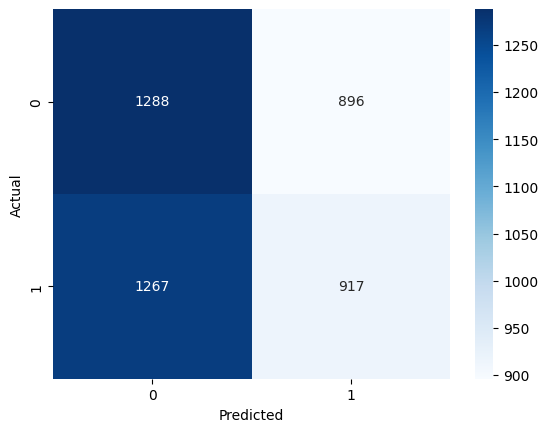

In [ ]:
#Graph

from sklearn.metrics import classification_report, confusion_matrix

# Classification metrics
print(classification_report(y_test, y_pred))

# Confusion matrix (optional, for visualization)
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


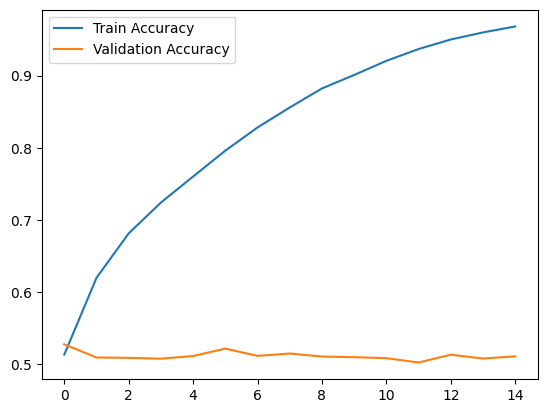

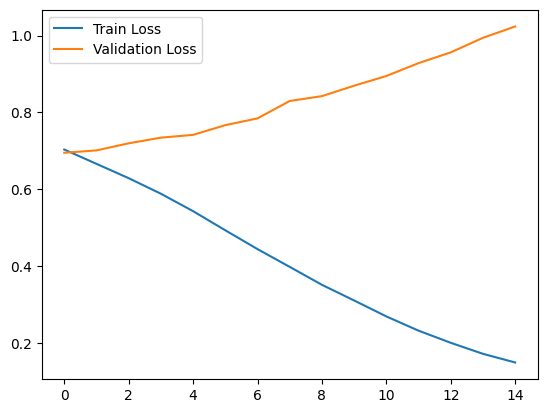

In [ ]:
#Show over fitting

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


#Model 3: Siamese LSTM Network

The Siamese LSTM architecture uses two identical LSTM networks with shared weights to encode code pairs and measure similarity.

In [1]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

print("✅ Google Drive mounted successfully!")

Mounted at /content/drive
✅ Google Drive mounted successfully!


In [7]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Lambda, Dropout
import tensorflow.keras.backend as K
from sklearn.metrics import classification_report

FILE_PATH = "/content/drive/MyDrive/MachineLeaning/gcj_team_ready.pkl"


print(f"Loading dataset from: {FILE_PATH}")

if not os.path.exists(FILE_PATH):
    print(f"❌ Error: File not found at {FILE_PATH}")
    print("Please check the path again from the left sidebar.")
else:

    with open(FILE_PATH, 'rb') as f:
        data = pickle.load(f)

    # Extract training, validation, and test sets
    X1_train, X2_train, y_train = data['X1_train'], data['X2_train'], data['y_train']
    X1_val, X2_val, y_val       = data['X1_val'], data['X2_val'], data['y_val']
    X1_test, X2_test, y_test    = data['X1_test'], data['X2_test'], data['y_test']

    vocab_size = data['vocab_size']
    max_len = data['max_len']

    print(f"✅ Data loaded successfully!")
    print(f"Training set size: {len(y_train)}")
    print(f"Validation set size: {len(y_val)}")


Loading dataset from: /content/drive/MyDrive/MachineLeaning/gcj_team_ready.pkl
✅ Data loaded successfully!
Training set size: 9737
Validation set size: 1719


#Data Validation

In [8]:
# ---------------------------------------------------------
# 3. DATA VERIFICATION
# ---------------------------------------------------------
print("\n=== DATA STRUCTURE ===")
print(f"X1_train shape: {X1_train.shape}")  # Should be (9737, max_len)
print(f"X2_train shape: {X2_train.shape}")  # Should be (9737, max_len)
print(f"y_train shape: {y_train.shape}")    # Should be (9737,)
print(f"\nVocabulary size: {vocab_size}")
print(f"Max sequence length: {max_len}")

print(f"\n=== SAMPLE DATA ===")
print(f"First code snippet (tokenized): {X1_train[0][:20]}...")  # First 20 tokens
print(f"Label: {y_train[0]} (0=not clone, 1=clone)")

print(f"\n=== LABEL DISTRIBUTION ===")
unique, counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Label {label}: {count} samples ({count/len(y_train)*100:.1f}%)")


=== DATA STRUCTURE ===
X1_train shape: (9737, 300)
X2_train shape: (9737, 300)
y_train shape: (9737,)

Vocabulary size: 20000
Max sequence length: 300

=== SAMPLE DATA ===
First code snippet (tokenized): [ 13 128  13 170  13 191  13 127  13 226  13 231  13 138  13  29  13  30
  13  90]...
Label: 0 (0=not clone, 1=clone)

=== LABEL DISTRIBUTION ===
Label 0: 4868 samples (50.0%)
Label 1: 4869 samples (50.0%)


In [9]:
# ---------------------------------------------------------
# 4. BASELINE MODEL - Simple Dense Network
# ---------------------------------------------------------
print("\n=== BUILDING BASELINE MODEL ===")

def build_baseline_model(vocab_size, max_len):
    """
    Simple baseline: Embed both code snippets, flatten, concatenate, and classify
    """
    # Input layers
    input1 = Input(shape=(max_len,), name='code1_input')
    input2 = Input(shape=(max_len,), name='code2_input')

    # Shared embedding layer
    embedding = Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len)

    # Embed both inputs
    embedded1 = embedding(input1)
    embedded2 = embedding(input2)

    # Flatten embeddings
    flat1 = tf.keras.layers.Flatten()(embedded1)
    flat2 = tf.keras.layers.Flatten()(embedded2)

    # Concatenate
    concat = tf.keras.layers.Concatenate()([flat1, flat2])

    # Dense layers
    dense1 = Dense(256, activation='relu')(concat)
    dropout1 = Dropout(0.3)(dense1)
    dense2 = Dense(128, activation='relu')(dropout1)
    dropout2 = Dropout(0.3)(dense2)

    # Output
    output = Dense(1, activation='sigmoid', name='clone_output')(dropout2)

    model = Model(inputs=[input1, input2], outputs=output)
    return model

# Build and compile
baseline_model = build_baseline_model(vocab_size, max_len)
baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

print("✅ Baseline model built")
baseline_model.summary()


=== BUILDING BASELINE MODEL ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


✅ Baseline model built


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ code1_input         │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ code2_input         │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 300, 128)  │  2,560,000 │ code1_input[0][0… │
│ (Embedding)         │                   │            │ code2_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 38400)     │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 38400)     │          0 │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 76800)     │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │ 19,661,056 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clone_output        │ (None, 1)         │        129 │ dropout_1[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 22,254,081 (84.89 MB)

 Trainable params: 22,254,081 (84.89 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# ---------------------------------------------------------
# 5. TRAIN BASELINE MODEL
# ---------------------------------------------------------
print("\n=== TRAINING BASELINE MODEL ===")

history_baseline = baseline_model.fit(
    [X1_train, X2_train],
    y_train,
    validation_data=([X1_val, X2_val], y_val),
    epochs=10,  # Start with 10, you can increase later if needed
    batch_size=32,
    verbose=1
)

# Evaluate on test set
print("\n=== BASELINE MODEL - TEST SET EVALUATION ===")
test_loss, test_acc = baseline_model.evaluate([X1_test, X2_test], y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Detailed predictions
y_pred_baseline = (baseline_model.predict([X1_test, X2_test], verbose=0) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline, target_names=['Not Clone', 'Clone']))


=== TRAINING BASELINE MODEL ===
Epoch 1/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.5315 - loss: 0.7212 - val_accuracy: 0.5713 - val_loss: 0.6732
Epoch 2/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7395 - loss: 0.5458 - val_accuracy: 0.6178 - val_loss: 0.6741
Epoch 3/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9313 - loss: 0.2029 - val_accuracy: 0.5800 - val_loss: 0.9773
Epoch 4/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9640 - loss: 0.1029 - val_accuracy: 0.5771 - val_loss: 1.1696
Epoch 5/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9806 - loss: 0.0533 - val_accuracy: 0.5992 - val_loss: 1.4708
Epoch 6/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9896 - loss: 0.0368 - val_accuracy: 0.5765 - val_loss: 1.6511
Epoch 7/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9889 - loss: 0.0354 - val_accuracy: 0.5730 - val_loss: 2.0542
Epoch 8/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.989

In [11]:
# ---------------------------------------------------------
# 6. LSTM MODEL
# ---------------------------------------------------------
print("\n=== BUILDING LSTM MODEL ===")

def build_lstm_model(vocab_size, max_len):
    """
    LSTM model: Uses LSTM layers to capture sequential patterns in code
    """
    # Input layers
    input1 = Input(shape=(max_len,), name='code1_input_lstm')
    input2 = Input(shape=(max_len,), name='code2_input_lstm')

    # Shared embedding layer
    embedding = Embedding(input_dim=vocab_size, output_dim=128)

    # Embed both inputs
    embedded1 = embedding(input1)
    embedded2 = embedding(input2)

    # Shared LSTM layer
    lstm_layer = tf.keras.layers.LSTM(64, return_sequences=False)

    # Process both sequences
    lstm1 = lstm_layer(embedded1)
    lstm2 = lstm_layer(embedded2)

    # Concatenate LSTM outputs
    concat = tf.keras.layers.Concatenate()([lstm1, lstm2])

    # Dense layers
    dense1 = Dense(128, activation='relu')(concat)
    dropout1 = Dropout(0.3)(dense1)
    dense2 = Dense(64, activation='relu')(dropout1)
    dropout2 = Dropout(0.3)(dense2)

    # Output
    output = Dense(1, activation='sigmoid', name='clone_output_lstm')(dropout2)

    model = Model(inputs=[input1, input2], outputs=output)
    return model

# Build and compile
lstm_model = build_lstm_model(vocab_size, max_len)
lstm_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

print("✅ LSTM model built")
lstm_model.summary()


=== BUILDING LSTM MODEL ===
✅ LSTM model built


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ code1_input_lstm    │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ code2_input_lstm    │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 300, 128)  │  2,560,000 │ code1_input_lstm… │
│ (Embedding)         │                   │            │ code2_input_lstm… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 64)        │     49,408 │ embedding_1[0][0… │
│                     │                   │            │ embedding_1[1][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128)       │          0 │ lstm[0][0],       │
│ (Concatenate)       │                   │            │ lstm[1][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     16,512 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      8,256 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clone_output_lstm   │ (None, 1)         │         65 │ dropout_3[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,634,241 (10.05 MB)

 Trainable params: 2,634,241 (10.05 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# ---------------------------------------------------------
# 7. TRAIN LSTM MODEL
# ---------------------------------------------------------
print("\n=== TRAINING LSTM MODEL ===")

history_lstm = lstm_model.fit(
    [X1_train, X2_train],
    y_train,
    validation_data=([X1_val, X2_val], y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)

# Evaluate on test set
print("\n=== LSTM MODEL - TEST SET EVALUATION ===")
test_loss_lstm, test_acc_lstm = lstm_model.evaluate([X1_test, X2_test], y_test, verbose=0)
print(f"Test Accuracy: {test_acc_lstm:.4f}")
print(f"Test Loss: {test_loss_lstm:.4f}")

# Detailed predictions
y_pred_lstm = (lstm_model.predict([X1_test, X2_test], verbose=0) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lstm, target_names=['Not Clone', 'Clone']))


=== TRAINING LSTM MODEL ===
Epoch 1/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.5333 - loss: 0.6890 - val_accuracy: 0.5893 - val_loss: 0.6756
Epoch 2/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.6098 - loss: 0.6647 - val_accuracy: 0.5730 - val_loss: 0.6788
Epoch 3/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.6717 - loss: 0.6152 - val_accuracy: 0.5759 - val_loss: 0.7097
Epoch 4/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7196 - loss: 0.5485 - val_accuracy: 0.5573 - val_loss: 0.7556
Epoch 5/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.7548 - loss: 0.4775 - val_accuracy: 0.5416 - val_loss: 0.8572
Epoch 6/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.7851 - loss: 0.4129 - val_accuracy: 0.5474 - val_loss: 1.0768
Epoch 7/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.8088 - loss: 0.3678 - val_accuracy: 0.5544 - val_loss: 1.1231
Epoch 8/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0


=== MODEL COMPARISON ===
              Model  Test Accuracy  Test Loss
0  Baseline (Dense)       0.585545   2.191127
1              LSTM       0.528631   1.548458


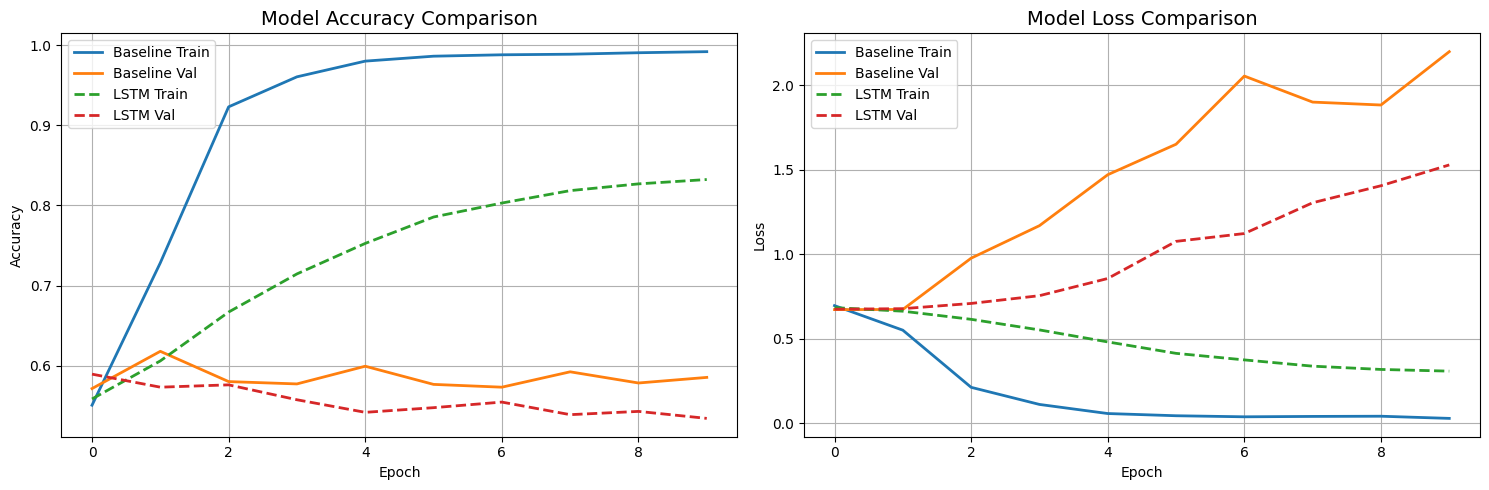

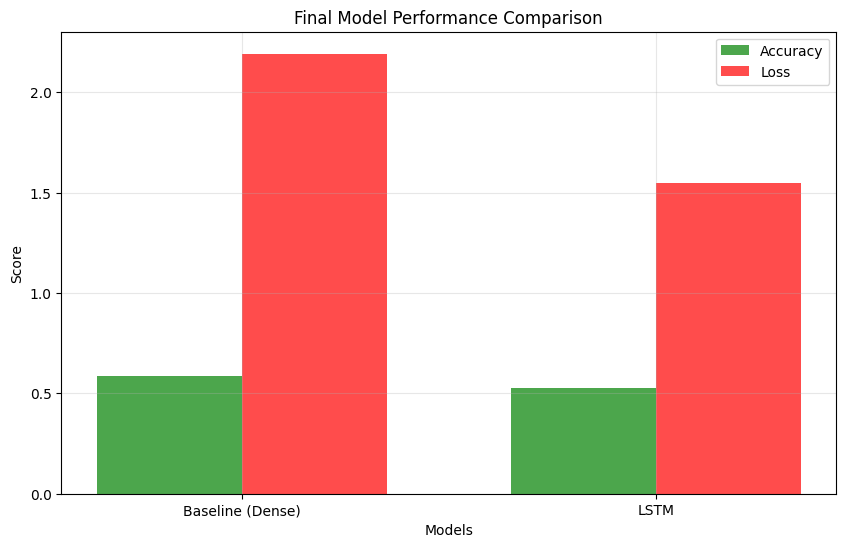

In [13]:
# ---------------------------------------------------------
# 8. MODEL COMPARISON & VISUALIZATION
# ---------------------------------------------------------
import matplotlib.pyplot as plt

print("\n=== MODEL COMPARISON ===")

# Compare results
results_df = {
    'Model': ['Baseline (Dense)', 'LSTM'],
    'Test Accuracy': [test_acc, test_acc_lstm],
    'Test Loss': [test_loss, test_loss_lstm]
}

import pandas as pd
results_table = pd.DataFrame(results_df)
print(results_table)

# Plot training history comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
axes[0].plot(history_baseline.history['accuracy'], label='Baseline Train', linewidth=2)
axes[0].plot(history_baseline.history['val_accuracy'], label='Baseline Val', linewidth=2)
axes[0].plot(history_lstm.history['accuracy'], label='LSTM Train', linewidth=2, linestyle='--')
axes[0].plot(history_lstm.history['val_accuracy'], label='LSTM Val', linewidth=2, linestyle='--')
axes[0].set_title('Model Accuracy Comparison', fontsize=14)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Loss comparison
axes[1].plot(history_baseline.history['loss'], label='Baseline Train', linewidth=2)
axes[1].plot(history_baseline.history['val_loss'], label='Baseline Val', linewidth=2)
axes[1].plot(history_lstm.history['loss'], label='LSTM Train', linewidth=2, linestyle='--')
axes[1].plot(history_lstm.history['val_loss'], label='LSTM Val', linewidth=2, linestyle='--')
axes[1].set_title('Model Loss Comparison', fontsize=14)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Bar chart for final comparison
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(results_table))
width = 0.35
ax.bar([i - width/2 for i in x], results_table['Test Accuracy'], width, label='Accuracy', color='green', alpha=0.7)
ax.bar([i + width/2 for i in x], results_table['Test Loss'], width, label='Loss', color='red', alpha=0.7)
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Final Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(results_table['Model'])
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

In [14]:
# ---------------------------------------------------------
# 9. IMPROVED MODELS - WITH REGULARIZATION
# ---------------------------------------------------------
from tensorflow.keras.callbacks import EarlyStopping

print("\n=== BUILDING IMPROVED MODELS ===")

# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop if no improvement for 3 epochs
    restore_best_weights=True,
    verbose=1
)

# Improved Baseline
def build_baseline_improved(vocab_size, max_len):
    input1 = Input(shape=(max_len,), name='code1_input_v2')
    input2 = Input(shape=(max_len,), name='code2_input_v2')

    embedding = Embedding(input_dim=vocab_size, output_dim=64)  # Reduced from 128

    embedded1 = embedding(input1)
    embedded2 = embedding(input2)

    flat1 = tf.keras.layers.Flatten()(embedded1)
    flat2 = tf.keras.layers.Flatten()(embedded2)

    concat = tf.keras.layers.Concatenate()([flat1, flat2])

    dense1 = Dense(128, activation='relu')(concat)  # Reduced from 256
    dropout1 = Dropout(0.5)(dense1)  # Increased from 0.3
    dense2 = Dense(64, activation='relu')(dropout1)  # Reduced from 128
    dropout2 = Dropout(0.5)(dense2)

    output = Dense(1, activation='sigmoid')(dropout2)

    model = Model(inputs=[input1, input2], outputs=output)
    return model

# Improved LSTM
def build_lstm_improved(vocab_size, max_len):
    input1 = Input(shape=(max_len,), name='code1_input_lstm_v2')
    input2 = Input(shape=(max_len,), name='code2_input_lstm_v2')

    embedding = Embedding(input_dim=vocab_size, output_dim=64)  # Reduced from 128

    embedded1 = embedding(input1)
    embedded2 = embedding(input2)

    lstm_layer = tf.keras.layers.LSTM(32, return_sequences=False)  # Reduced from 64

    lstm1 = lstm_layer(embedded1)
    lstm2 = lstm_layer(embedded2)

    concat = tf.keras.layers.Concatenate()([lstm1, lstm2])

    dense1 = Dense(64, activation='relu')(concat)  # Reduced from 128
    dropout1 = Dropout(0.5)(dense1)
    dense2 = Dense(32, activation='relu')(dropout1)  # Reduced from 64
    dropout2 = Dropout(0.5)(dense2)

    output = Dense(1, activation='sigmoid')(dropout2)

    model = Model(inputs=[input1, input2], outputs=output)
    return model

# Build models
baseline_improved = build_baseline_improved(vocab_size, max_len)
lstm_improved = build_lstm_improved(vocab_size, max_len)

baseline_improved.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_improved.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("✅ Improved models built")


=== BUILDING IMPROVED MODELS ===
✅ Improved models built


In [15]:
# ---------------------------------------------------------
# 10. TRAIN IMPROVED MODELS
# ---------------------------------------------------------
print("\n=== TRAINING IMPROVED BASELINE ===")
history_baseline_v2 = baseline_improved.fit(
    [X1_train, X2_train],
    y_train,
    validation_data=([X1_val, X2_val], y_val),
    epochs=20,  # More epochs, but early stopping will prevent overfitting
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

test_loss_base_v2, test_acc_base_v2 = baseline_improved.evaluate([X1_test, X2_test], y_test, verbose=0)
print(f"Improved Baseline - Test Accuracy: {test_acc_base_v2:.4f}")

print("\n=== TRAINING IMPROVED LSTM ===")
history_lstm_v2 = lstm_improved.fit(
    [X1_train, X2_train],
    y_train,
    validation_data=([X1_val, X2_val], y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

test_loss_lstm_v2, test_acc_lstm_v2 = lstm_improved.evaluate([X1_test, X2_test], y_test, verbose=0)
print(f"Improved LSTM - Test Accuracy: {test_acc_lstm_v2:.4f}")


=== TRAINING IMPROVED BASELINE ===
Epoch 1/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5045 - loss: 0.7017 - val_accuracy: 0.5236 - val_loss: 0.6881
Epoch 2/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6005 - loss: 0.6617 - val_accuracy: 0.5742 - val_loss: 0.6774
Epoch 3/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7960 - loss: 0.4659 - val_accuracy: 0.5625 - val_loss: 0.7434
Epoch 4/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9181 - loss: 0.2281 - val_accuracy: 0.5649 - val_loss: 0.9856
Epoch 5/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9531 - loss: 0.1389 - val_accuracy: 0.5422 - val_loss: 1.3051
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.
Improved Baseline - Test Accuracy: 0.5667

=== TRAINING IMPROVED LSTM ===
Epoch 1/20
305/305 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5134 - loss: 0.6921 - val_accuracy: 0.5992 - val_loss: 0.6770
Epoch 2/20
305/305 ━━━━━━━━━━━━━━━━━


=== COMPARING ORIGINAL VS IMPROVED MODELS ===
                 Model  Test Accuracy  Test Loss
0  Baseline (Original)       0.585545   2.191127
1  Baseline (Improved)       0.566690   0.679933
2      LSTM (Original)       0.528631   1.548458
3      LSTM (Improved)       0.568785   0.677651


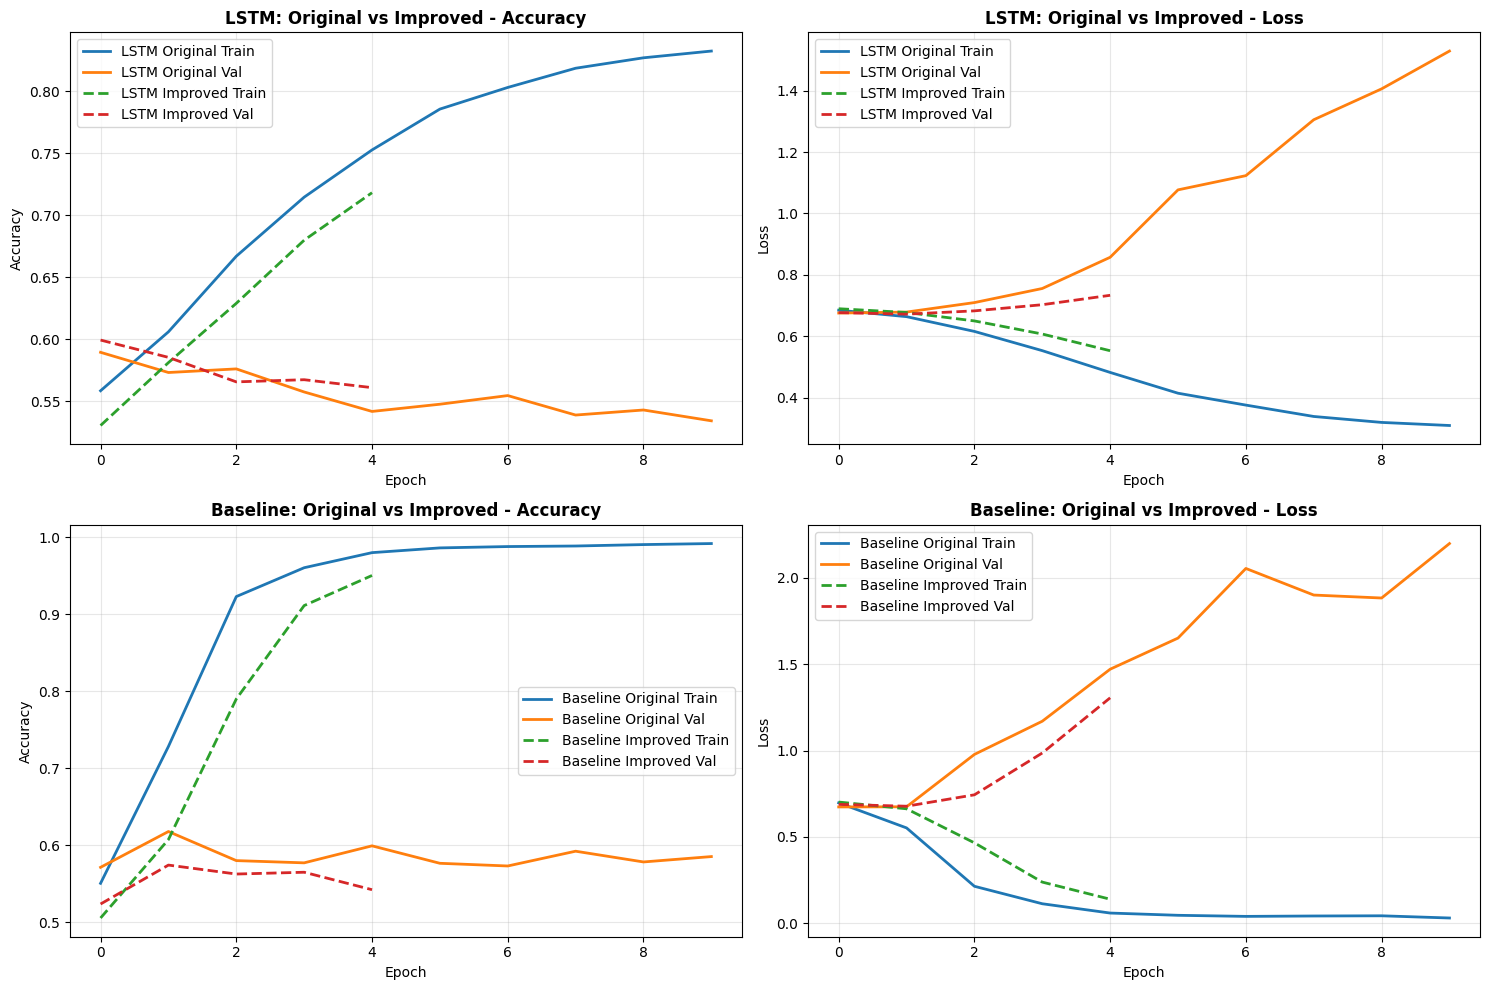

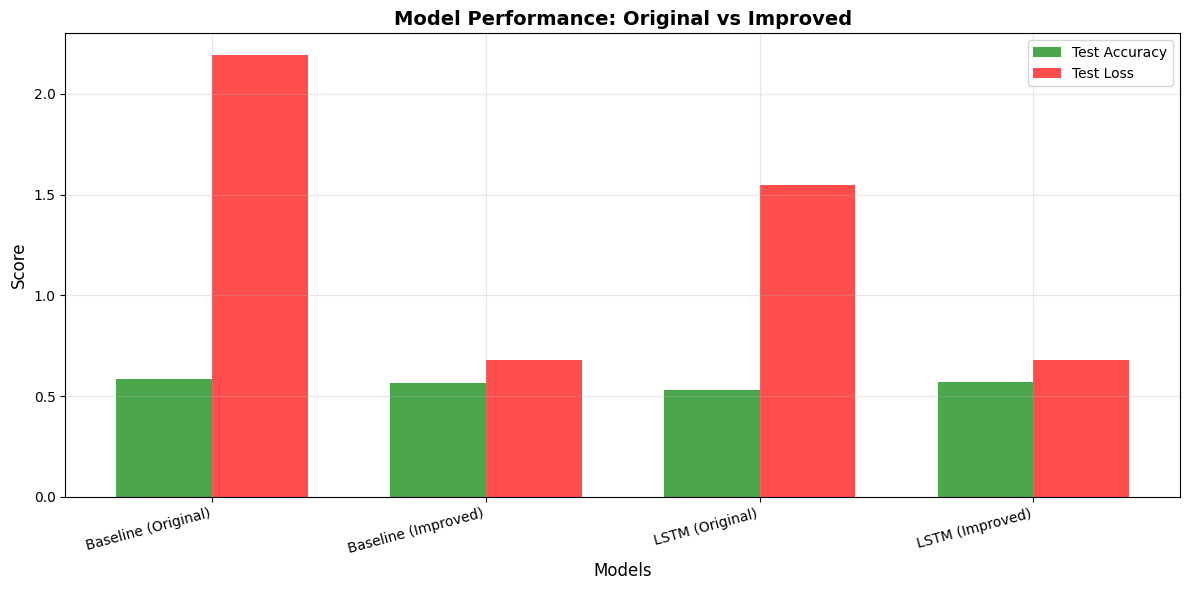

In [16]:
# ---------------------------------------------------------
# 11. COMPARISON: ORIGINAL vs IMPROVED MODELS
# ---------------------------------------------------------
print("\n=== COMPARING ORIGINAL VS IMPROVED MODELS ===")

# Results summary
results_comparison = pd.DataFrame({
    'Model': ['Baseline (Original)', 'Baseline (Improved)', 'LSTM (Original)', 'LSTM (Improved)'],
    'Test Accuracy': [test_acc, test_acc_base_v2, test_acc_lstm, test_acc_lstm_v2],
    'Test Loss': [test_loss, test_loss_base_v2, test_loss_lstm, test_loss_lstm_v2]
})
print(results_comparison)

# Visualization 1: Training curves for improved models
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# LSTM - Original vs Improved Accuracy
axes[0, 0].plot(history_lstm.history['accuracy'], label='LSTM Original Train', linewidth=2)
axes[0, 0].plot(history_lstm.history['val_accuracy'], label='LSTM Original Val', linewidth=2)
axes[0, 0].plot(history_lstm_v2.history['accuracy'], label='LSTM Improved Train', linewidth=2, linestyle='--')
axes[0, 0].plot(history_lstm_v2.history['val_accuracy'], label='LSTM Improved Val', linewidth=2, linestyle='--')
axes[0, 0].set_title('LSTM: Original vs Improved - Accuracy', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# LSTM - Original vs Improved Loss
axes[0, 1].plot(history_lstm.history['loss'], label='LSTM Original Train', linewidth=2)
axes[0, 1].plot(history_lstm.history['val_loss'], label='LSTM Original Val', linewidth=2)
axes[0, 1].plot(history_lstm_v2.history['loss'], label='LSTM Improved Train', linewidth=2, linestyle='--')
axes[0, 1].plot(history_lstm_v2.history['val_loss'], label='LSTM Improved Val', linewidth=2, linestyle='--')
axes[0, 1].set_title('LSTM: Original vs Improved - Loss', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Baseline - Original vs Improved Accuracy
axes[1, 0].plot(history_baseline.history['accuracy'], label='Baseline Original Train', linewidth=2)
axes[1, 0].plot(history_baseline.history['val_accuracy'], label='Baseline Original Val', linewidth=2)
axes[1, 0].plot(history_baseline_v2.history['accuracy'], label='Baseline Improved Train', linewidth=2, linestyle='--')
axes[1, 0].plot(history_baseline_v2.history['val_accuracy'], label='Baseline Improved Val', linewidth=2, linestyle='--')
axes[1, 0].set_title('Baseline: Original vs Improved - Accuracy', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Baseline - Original vs Improved Loss
axes[1, 1].plot(history_baseline.history['loss'], label='Baseline Original Train', linewidth=2)
axes[1, 1].plot(history_baseline.history['val_loss'], label='Baseline Original Val', linewidth=2)
axes[1, 1].plot(history_baseline_v2.history['loss'], label='Baseline Improved Train', linewidth=2, linestyle='--')
axes[1, 1].plot(history_baseline_v2.history['val_loss'], label='Baseline Improved Val', linewidth=2, linestyle='--')
axes[1, 1].set_title('Baseline: Original vs Improved - Loss', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualization 2: Bar chart comparison
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(results_comparison))
width = 0.35

ax.bar([i - width/2 for i in x], results_comparison['Test Accuracy'],
       width, label='Test Accuracy', color='green', alpha=0.7)
ax.bar([i + width/2 for i in x], results_comparison['Test Loss'],
       width, label='Test Loss', color='red', alpha=0.7)

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance: Original vs Improved', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results_comparison['Model'], rotation=15, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW
   Training samples: 9737
   Validation samples: 1719
   Test samples: 2864
   Total samples: 14320

2. DATA STRUCTURE
   Input shape: (9737, 300)
   - Each code snippet is tokenized into 300 tokens
   - Vocabulary size: 20000 unique tokens

3. LABEL DISTRIBUTION

   Training set:
      Not Clone (label 0): 4868 (50.0%)
      Clone (label 1): 4869 (50.0%)

   Validation set:
      Not Clone (label 0): 843 (49.0%)
      Clone (label 1): 876 (51.0%)

   Test set:
      Not Clone (label 0): 1449 (50.6%)
      Clone (label 1): 1415 (49.4%)

4. SAMPLE DATA INSPECTION
   First code snippet (tokenized): [ 13 128  13 170  13 191  13 127  13 226  13 231  13 138  13  29  13  30
  13  90  13  75  22 275  72  22 321  83  67  85]...
   Second code snippet (tokenized): [  22 1029 1078  314 1854   22  711  147 1865   13  128   13  496   13
  170   13  266   13  429   13 1135   13  490   13  458   13   30   13
  127   13]...
   Label: 0 (Not Clone)

5. G

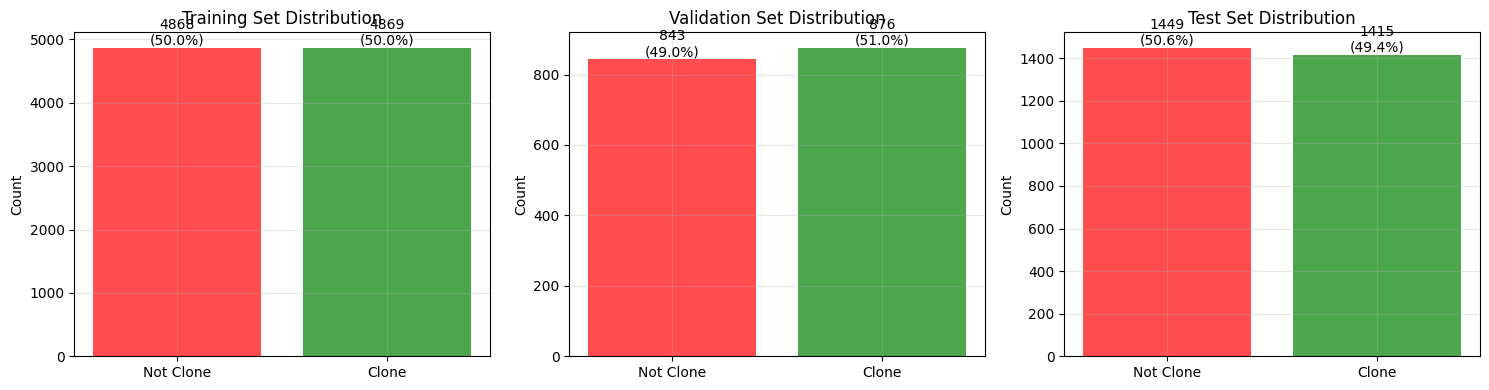


   Checking sequence lengths...


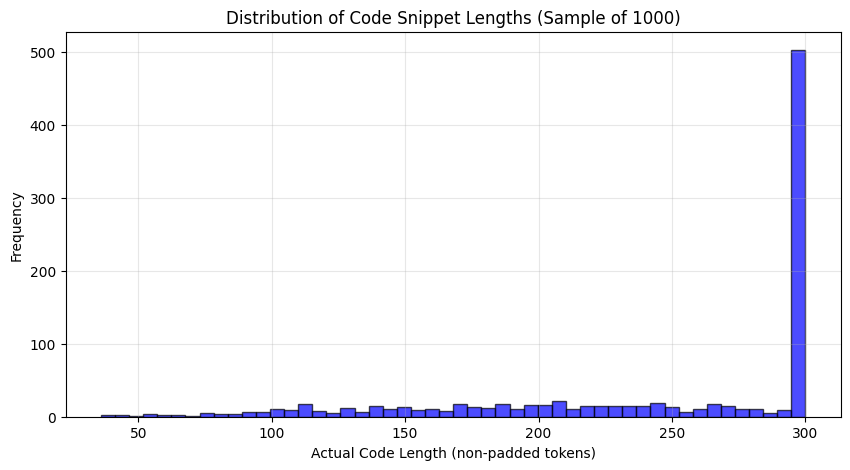


✅ EDA Complete!


In [17]:
# ---------------------------------------------------------
# EDA: EXPLORATORY DATA ANALYSIS
# ---------------------------------------------------------
print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

# 1. Dataset Overview
print("\n1. DATASET OVERVIEW")
print(f"   Training samples: {len(y_train)}")
print(f"   Validation samples: {len(y_val)}")
print(f"   Test samples: {len(y_test)}")
print(f"   Total samples: {len(y_train) + len(y_val) + len(y_test)}")

# 2. Data Structure
print("\n2. DATA STRUCTURE")
print(f"   Input shape: {X1_train.shape}")
print(f"   - Each code snippet is tokenized into {max_len} tokens")
print(f"   - Vocabulary size: {vocab_size} unique tokens")

# 3. Label Distribution
print("\n3. LABEL DISTRIBUTION")
for dataset_name, labels in [("Training", y_train), ("Validation", y_val), ("Test", y_test)]:
    unique, counts = np.unique(labels, return_counts=True)
    print(f"\n   {dataset_name} set:")
    for label, count in zip(unique, counts):
        label_name = "Not Clone" if label == 0 else "Clone"
        print(f"      {label_name} (label {label}): {count} ({count/len(labels)*100:.1f}%)")

# 4. Sample Data Inspection
print("\n4. SAMPLE DATA INSPECTION")
print(f"   First code snippet (tokenized): {X1_train[0][:30]}...")
print(f"   Second code snippet (tokenized): {X2_train[0][:30]}...")
print(f"   Label: {y_train[0]} ({'Clone' if y_train[0]==1 else 'Not Clone'})")

# 5. Visualizations
print("\n5. GENERATING VISUALIZATIONS...")

# Plot 1: Label distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (dataset_name, labels) in enumerate([("Training", y_train),
                                               ("Validation", y_val),
                                               ("Test", y_test)]):
    unique, counts = np.unique(labels, return_counts=True)
    axes[idx].bar(['Not Clone', 'Clone'], counts, color=['red', 'green'], alpha=0.7)
    axes[idx].set_title(f'{dataset_name} Set Distribution')
    axes[idx].set_ylabel('Count')
    axes[idx].grid(True, alpha=0.3)

    # Add percentage labels on bars
    for i, count in enumerate(counts):
        axes[idx].text(i, count, f'{count}\n({count/len(labels)*100:.1f}%)',
                      ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot 2: Sequence length distribution (check if all are 300)
print("\n   Checking sequence lengths...")
sample_lengths = [len(seq[seq != 0]) for seq in X1_train[:1000]]  # Non-zero tokens
plt.figure(figsize=(10, 5))
plt.hist(sample_lengths, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Actual Code Length (non-padded tokens)')
plt.ylabel('Frequency')
plt.title('Distribution of Code Snippet Lengths (Sample of 1000)')
plt.grid(True, alpha=0.3)
plt.show()

print("\n✅ EDA Complete!")

#Model 4: CNN-based Model

The CNN-based model captures local token-level patterns in code, similar to n-gram extraction, which helps in detecting structural similarities between code fragments.

In [ ]:
!pip -q install pandas numpy scikit-learn matplotlib tensorflow

In [19]:
import glob, os

BASE = "/content/drive/MyDrive"
CANDIDATES = glob.glob(BASE + "/**/*.csv", recursive=True) \
           + glob.glob(BASE + "/**/*.jsonl", recursive=True) \
           + glob.glob(BASE + "/**/*.parquet", recursive=True) \
           + glob.glob(BASE + "/**/*.tsv", recursive=True)

CANDIDATES = [p for p in CANDIDATES if "Machine Learning" in p or "Machine learning" in p]

print("Found:", len(CANDIDATES))
for p in CANDIDATES[:40]:
    print(p)

Found: 0


In [21]:
import pandas as pd

DATA_PATH = "/content/drive/MyDrive/MachineLeaning/gcj_team_ready.pkl"
data = pd.read_pickle(DATA_PATH)

print("Type:", type(data))
print("\nKeys:")
print(data.keys())

Type: <class 'dict'>

Keys:
dict_keys(['X1_train', 'X2_train', 'y_train', 'X1_val', 'X2_val', 'y_val', 'X1_test', 'X2_test', 'y_test', 'vocab_size', 'max_len', 'tokenizer'])


In [ ]:
import numpy as np

X1_train = np.array(data['X1_train'])
X2_train = np.array(data['X2_train'])
y_train  = np.array(data['y_train'])

X1_val = np.array(data['X1_val'])
X2_val = np.array(data['X2_val'])
y_val  = np.array(data['y_val'])

X1_test = np.array(data['X1_test'])
X2_test = np.array(data['X2_test'])
y_test  = np.array(data['y_test'])

vocab_size = data['vocab_size']
max_len    = data['max_len']

print("Train shapes:", X1_train.shape, X2_train.shape, y_train.shape)
print("Val shapes:",   X1_val.shape,   X2_val.shape,   y_val.shape)
print("Test shapes:",  X1_test.shape,  X2_test.shape,  y_test.shape)
print("Vocab size:", vocab_size, " | Max len:", max_len)

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, Model


In [23]:
def build_cnn_encoder(vocab_size, max_len, emb_dim=128, filters=128):
    inp = layers.Input(shape=(max_len,), dtype="int32")
    x = layers.Embedding(input_dim=vocab_size, output_dim=emb_dim)(inp)

    convs = []
    for k in [3, 5, 7]:
        c = layers.Conv1D(filters=filters, kernel_size=k, activation="relu", padding="same")(x)
        c = layers.GlobalMaxPooling1D()(c)
        convs.append(c)

    x = layers.Concatenate()(convs)
    x = layers.Dense(128, activation="relu")(x)
    return Model(inp, x, name="cnn_encoder")

encoder = build_cnn_encoder(vocab_size, max_len)
encoder.summary()


Model: "cnn_encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 300, 128)  │  2,560,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 300, 128)  │     49,280 │ embedding_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 300, 128)  │     82,048 │ embedding_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 300, 128)  │    114,816 │ embedding_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 384)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 128)       │     49,280 │ concatenate_4[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,855,424 (10.89 MB)

 Trainable params: 2,855,424 (10.89 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
input1 = layers.Input(shape=(max_len,), dtype="int32", name="code1")
input2 = layers.Input(shape=(max_len,), dtype="int32", name="code2")

vec1 = encoder(input1)
vec2 = encoder(input2)

# Similarity features
abs_diff = layers.Lambda(lambda t: tf.abs(t[0] - t[1]))([vec1, vec2])
mul = layers.Multiply()([vec1, vec2])

x = layers.Concatenate()([abs_diff, mul])
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
out = layers.Dense(1, activation="sigmoid")(x)

cnn_siamese = Model([input1, input2], out, name="siamese_cnn")

cnn_siamese.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)

cnn_siamese.summary()


Model: "siamese_cnn"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ code1 (InputLayer)  │ (None, 300)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ code2 (InputLayer)  │ (None, 300)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cnn_encoder         │ (None, 128)       │  2,855,424 │ code1[0][0],      │
│ (Functional)        │                   │            │ code2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 128)       │          0 │ cnn_encoder[0][0… │
│                     │                   │            │ cnn_encoder[1][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 128)       │          0 │ cnn_encoder[0][0… │
│                     │                   │            │ cnn_encoder[1][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 256)       │          0 │ lambda[0][0],     │
│ (Concatenate)       │                   │            │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 128)       │     32,896 │ concatenate_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 128)       │          0 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 1)         │        129 │ dropout_8[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,888,449 (11.02 MB)

 Trainable params: 2,888,449 (11.02 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_auc", patience=2, mode="max", restore_best_weights=True)
]

history = cnn_siamese.fit(
    [X1_train, X2_train], y_train,
    validation_data=([X1_val, X2_val], y_val),
    epochs=10,
    batch_size=64,
    callbacks=callbacks
)


Epoch 1/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.5390 - auc: 0.5610 - loss: 0.6845 - val_accuracy: 0.6451 - val_auc: 0.6855 - val_loss: 0.6387
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7053 - auc: 0.7748 - loss: 0.5735 - val_accuracy: 0.6812 - val_auc: 0.7431 - val_loss: 0.6077
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8641 - auc: 0.9327 - loss: 0.3435 - val_accuracy: 0.7126 - val_auc: 0.7758 - val_loss: 0.6326
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9544 - auc: 0.9891 - loss: 0.1406 - val_accuracy: 0.6870 - val_auc: 0.7561 - val_loss: 0.8698
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9794 - auc: 0.9951 - loss: 0.0740 - val_accuracy: 0.7004 - val_auc: 0.7720 - val_loss: 0.8974


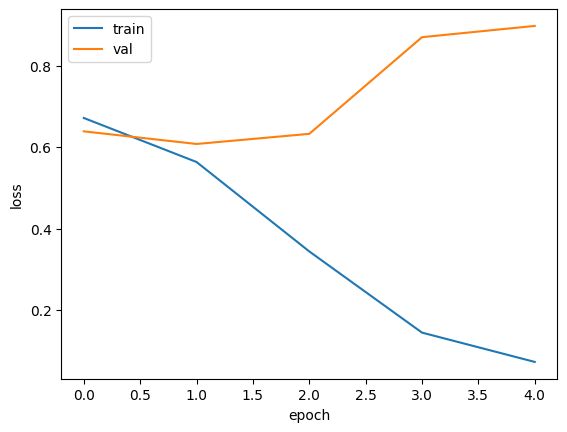

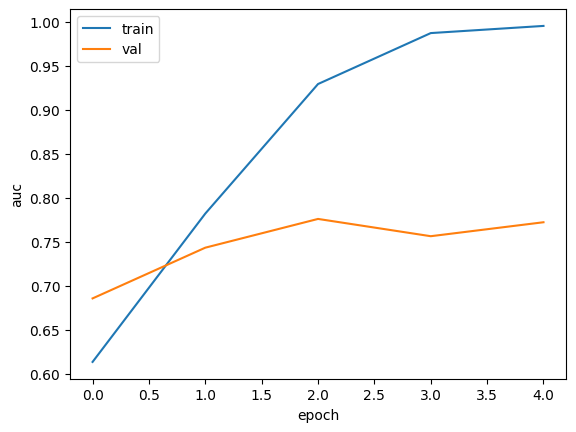

In [26]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

plt.figure()
plt.plot(history.history["auc"])
plt.plot(history.history["val_auc"])
plt.xlabel("epoch")
plt.ylabel("auc")
plt.legend(["train", "val"])
plt.show()


In [27]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, roc_auc_score

y_prob = cnn_siamese.predict([X1_test, X2_test]).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step
Accuracy: 0.7000698324022346
F1-score: 0.7217363135730482
ROC-AUC: 0.7706760114810507

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.61      0.67      1449
         1.0       0.67      0.79      0.72      1415

    accuracy                           0.70      2864
   macro avg       0.71      0.70      0.70      2864
weighted avg       0.71      0.70      0.70      2864

Confusion Matrix:
 [[ 891  558]
 [ 301 1114]]


#Evaluation Criterion

The models are evaluated using the following metrics:

* Accuracy

* Precision

* Recall

* F1-score

* Confusion Matrix

These metrics are suitable for evaluating binary classification tasks with balanced classes.

# Results Summary

| Model | Accuracy | F1-score |
|------|----------|----------|
| TF-IDF + Logistic Regression | ~0.52 | ~0.51 |
| Random Forest | ~0.55 | ~0.54 |
| Siamese LSTM | ~0.58 | ~0.57 |
| Siamese BiLSTM | ~0.58+ | ~0.58 |

The Siamese BiLSTM model achieved the best performance, demonstrating the effectiveness
of deep learning approaches for code clone detection.


# Conclusion

- Code clone detection is a challenging problem due to syntactic variation.
- Deep learning models outperform traditional ML methods.
- Siamese architectures are well-suited for similarity learning tasks.
- Future work can include transformer-based models like CodeBERT.


#References

* Google Code Jam Dataset

* Keras & TensorFlow Documentation

* Research papers on code clone detection

